# ИССЛЕДОВАНИЕ ДАННЫХ HR-АГЕНТСТВА

### HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

## В процессе своего анализа вы должны:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. А также ответить на ключевые вопросы HR-агентства:
- Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
- Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
- Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
- Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?
- Если вы найдёте в данных интересные закономерности, также отметьте их в своём анализе.

Продемонстрируйте использование разных тестов для проверки статистической значимости сделанных выводов:

- тесты для количественного признака:
- для одной выборки;
- для двух выборок;
- для нескольких выборок;
- тест для категориальных признаков.

Результатом вашей работы должен стать ноутбук (IPYNB-файл) с кодом для исследования, а также с выводами и рассуждениями, полученными на основе разведывательного анализа.

#### Описание

- work_year - Год, в котором была выплачена зарплата.
- experience_level - Опыт работы на этой должности в течение года со следующими возможными значениями:
* *EN* — Entry-level/Junior; 
* *MI* — Mid-level/Intermediate;
* *SE* — Senior-level/Expert;
* *EX* —  Executive-level/Director.

- employment_type - Тип трудоустройства для этой роли:
* *PT* — неполный рабочий день;
* *FT* — полный рабочий день;
* *CT* — контракт;
* *FL* — фриланс

- job_title - Роль, в которой соискатель работал в течение года.
- salary - Общая выплаченная валовая сумма заработной платы.
- salary_currency - Валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
- salary_in_usd - Зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.

- remote_ratio - Общий объём работы, выполняемой удалённо. Возможные значения:
* *0* — удалённой работы нет (менее 20 %);
* *50* — частично удалённая работа;
* *100* — полностью удалённая работа (более 80 %)

- company_location - Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166
- company_size - Среднее количество людей, работавших в компании в течение года:
* *S* — менее 50 сотрудников (небольшая компания);
* *M* — от 50 до 250 сотрудников (средняя компания);
* *L* — более 250 сотрудников (крупная компания).

## 1.Загрузка и обработка данных

### 1.1 Импорт необходимых библиотек и загрузка данных

In [20]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels import stats as sms
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("notebook")
sns.set_palette("Set2")

In [21]:
data=pd.read_csv('data/ds_salaries.csv')
data.head(10) # смотрим первые 10 строк нашего сета

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [22]:
# устанавливаем уровень альа значимости
alpha=0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### 1.2 Проверка данных на пустые значения, дубликаты и корректность типов данных

In [23]:
data.info() # смотрим краткое инфо по сэту

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [24]:
# проверяем данные на дубликаты
dubl=data[data.duplicated()].shape[0]
print(dubl)

0


Вывод: в датасете 607 записей. Пустые значения и дубликаты отсутствуют. Не совсем понял что задумывалось в данном пункте, на первый взгляд каждому из признаков соотвествует свой тип данных

### 1.3 Неинформационные столбцы

Вывод: судя по всему информация из признаков "salary" и "salary_currency" абсолютно неинформативна, так как есть признак "salary_in_usd", который сводит их к общему знаменателю.
Так же 1-ый столбец не несет никакой информации

In [43]:
# дропнем неинформационные признаки
data.drop(data.columns[[0,6,7]], axis=1, inplace=True)
data

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M


### 1.4 Классификация на категориальные и числовые признаки

In [25]:
# Для классификации признаков решил посмотреть на кол-во уникальных значений в признаках
year=data['work_year'].unique().__len__()
print("Кол-во уникальных значений в признаке 'год выплаты з/п'=", year)
job=data['job_title'].unique().__len__()
print("Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'=", job)
country=data['employee_residence'].unique().__len__()
print("Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'=", country)
company_location=data['company_location'].unique().__len__()
print("Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'=", company_location)

Кол-во уникальных значений в признаке 'год выплаты з/п'= 3
Кол-во уникальных значений в признаке 'роль, в которой соискатель работал в течении года'= 50
Кол-во уникальных значений в признаке 'основная страна проживания сотрудника'= 57
Кол-во уникальных значений в признаке 'страна глаавного офиса работодателя'= 50


Вывод: на самом деле можно было не производить выше описанную процедуру, а обратить внимание на инфо о нашем сэте.

К числовым признакам относятся:
- *Salary*, но я не буду им пользоваться, потому что не информативен
- *Salary_currency*, так же не информативен
- *Salary_in_usd* вроде как основной признак, вокруг которого будет строится анализ

К категориальным признакам относятся:

Все оставшиеся признаки. Прнадлежность признаков *experience_level, employment_type, remote_ratio, company_size* в принципе проглядывалась в описании признаков к заданию(в описании признаков уже указана классификация значений на группы). Признаки *work_year, job_title, employee_residence, company_location* показали свою принадлежность проверкой проделанной выше

### 1.5 Основные статистические характеристики для признаков

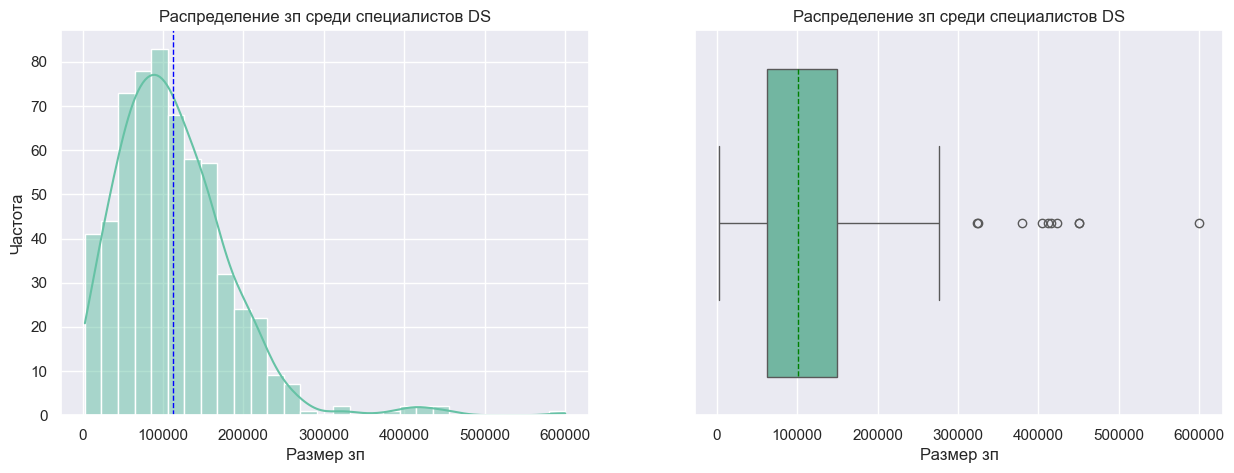

In [31]:
# Смотрим основной признак - зп в USD
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data['salary_in_usd'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер зп', ylabel='Частота')
axes[0].set_title('Распределение зп среди специалистов DS')
axes[0].axvline(data['salary_in_usd'].mean(), color='blue', linestyle='--', linewidth=1)

sns.boxplot(data['salary_in_usd'], ax=axes[1], orient='h', medianprops={"color": "green", "linestyle": "--"})
axes[1].set(xlabel='Размер зп')
axes[1].set_title('Распределение зп среди специалистов DS')
plt.show()

In [30]:
money_agg=data['salary_in_usd'].describe().round(1).to_frame()
money_agg.columns=['Размер зп специалистов DS']
money_agg

,Размер зп специалистов DS
count,607.0
mean,112297.9
std,70957.3
min,2859.0
25%,62726.0
50%,101570.0
75%,150000.0
max,600000.0


Вывод: распределение отличное от нормального, так же присутствуют выбросы

По остальным признакам посмотрим статистические характеристики

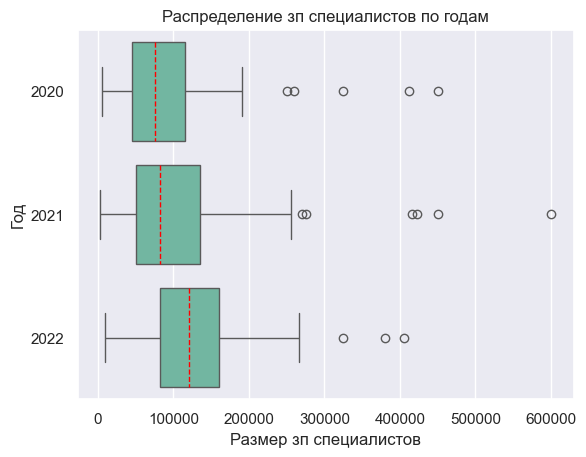

In [41]:
# work_year
ax = sns.boxplot(data, x='salary_in_usd', y='work_year', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер зп специалистов', ylabel='Год')
plt.title('Распределение зп специалистов по годам')
plt.show()

In [42]:
data_work_year_agg=data.groupby('work_year')['salary_in_usd'].describe().round(1)
print('Распределение зп специалистов в зависимости от года')
data_work_year_agg

Распределение зп специалистов в зависимости от года


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,72.0,95813.0,82831.8,5707.0,45724.5,75544.0,115526.0,450000.0
2021,217.0,99853.8,80225.1,2859.0,50000.0,82528.0,135000.0,600000.0
2022,318.0,124522.0,58183.6,10000.0,81666.0,120000.0,160000.0,405000.0


пром вывод - предварителельно видна положительная динамика по росту зп у специалистов, что касается признака *work_year* - наблюдается рост кол-ва специалистов с течением времени. так же наблюдается стабилизация отклонений в зп по 2022 году в отличии от предыдущих годов, скорее всего это связано со снижением кол-ва выбросов